In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/120890x29yej352513_126.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/1208l07t64ra342507_585.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/11081pr7qo10402548_450.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/11080s61n888472524_450.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/11083rmuxx0v292456_99..jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/1108834o7hb5372408_167.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/11080avuccjy092538_639.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/15086u0bvues412457_81..jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/120876dshhn6332505_657.jpeg
/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks/1108j03ad8yn592508_846.jpeg
/kaggle/input/weed-a

In [2]:
import os
import random
import shutil

# Paths
images_dir = r'/kaggle/input/weed-annotated/Weed_Final/intel Real Sense Depth_Clicks'
labels_dir = r'/kaggle/input/weed-annotated/Weed_Final/YOLO_darknet'
output_base = r'/kaggle/working/Weed_Final_Split'  # newly created folder

splits = ['train', 'val', 'test']
split_ratio = [0.7, 0.20, 0.10]  # Adjust as needed

# Make output directories
for split in splits:
    os.makedirs(os.path.join(output_base, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(output_base, 'labels', split), exist_ok=True)

# Get all images
images = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
random.shuffle(images)

n = len(images)
n_train = int(n * split_ratio[0])
n_val = int(n * split_ratio[1])
split_files = {
    'train': images[:n_train],
    'val': images[n_train : n_train + n_val],
    'test': images[n_train + n_val :]
}

for split in splits:
    for img in split_files[split]:
        # Copy image
        shutil.copy2(os.path.join(images_dir, img), os.path.join(output_base, 'images', split, img))
        # Copy label (only if it exists!)
        label_file = os.path.splitext(img)[0] + '.txt'
        src_label = os.path.join(labels_dir, label_file)
        if os.path.exists(src_label):
            shutil.copy2(src_label, os.path.join(output_base, 'labels', split, label_file))


In [3]:
import os

def check_dataset_split(images_base_path, labels_base_path, splits=['train', 'val', 'test']):
    for split in splits:
        images_dir = os.path.join(images_base_path, split)
        labels_dir = os.path.join(labels_base_path, split)

        image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

        image_basenames = set(os.path.splitext(f)[0] for f in image_files)
        label_basenames = set(os.path.splitext(f)[0] for f in label_files)

        missing_labels = image_basenames - label_basenames
        missing_images = label_basenames - image_basenames

        print(f'Checking split: {split}')
        print(f'Total images: {len(image_files)}')
        print(f'Total labels: {len(label_files)}')

        if missing_labels:
            print(f'WARNING: Images without labels: {missing_labels}')
        else:
            print('All images have matching labels.')

        if missing_images:
            print(f'WARNING: Labels without images: {missing_images}')
        else:
            print('All labels have matching images.')
        print('---')


images_path = '/kaggle/working/Weed_Final_Split/images'
labels_path = '/kaggle/working/Weed_Final_Split/labels'

check_dataset_split(images_path, labels_path)


Checking split: train
Total images: 4659
Total labels: 4659
All images have matching labels.
All labels have matching images.
---
Checking split: val
Total images: 1331
Total labels: 1331
All images have matching labels.
All labels have matching images.
---
Checking split: test
Total images: 666
Total labels: 666
All images have matching labels.
All labels have matching images.
---


In [4]:
class_names = [
    "Kena_(Commplina_benghalensio)",
    "Lavhala_(Cyperus_Rotundus)",
    "Lamber_Quarter_plant(Chenopodium_album)",
    "Little_Mallow(Malva_parviflora)",
    "Moti_dudhi(Euphorbia_geneculata_L)",
    "Obscure_morning_glory(Ipomoea_obscura)",
    "Asian_Pigeonwings_(Clitoria_Ternatea)",
    "Bilayat_(Mexicana_Argemone)",
    "Choti_dudhi_(Euphorbia_hirta)",
    "Digitaria_SP(Digitaria_Sanguinalis )",
    "Gajar_gavat_(Parthenium_hysterophorus)",
    "Graceful_Sandmart_(Euphorbia_hyssopifolia)",
    "Sicklepod_(Senna_obtusifolia)",
    "Harali_(Cynodon_dactylon)",
    "Dwarf_cassia_(Chamaecrista_pumila)",
    "Punarnava_(Boerhaavia_diffusa)"
]


In [5]:
import yaml

data_yaml = {
    'train': '/kaggle/working/Weed_Final_Split/images/train',
    'val': '/kaggle/working/Weed_Final_Split/images/val',
    'test': '/kaggle/working/Weed_Final_Split/images/test',  # optional
    'nc': len(class_names),
    'names': class_names
}

with open('/kaggle/working/Weed_Final_Split/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)


In [6]:


yaml_path = '/kaggle/working/Weed_Final_Split/data.yaml'  

with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

print(data)  


{'names': ['Kena_(Commplina_benghalensio)', 'Lavhala_(Cyperus_Rotundus)', 'Lamber_Quarter_plant(Chenopodium_album)', 'Little_Mallow(Malva_parviflora)', 'Moti_dudhi(Euphorbia_geneculata_L)', 'Obscure_morning_glory(Ipomoea_obscura)', 'Asian_Pigeonwings_(Clitoria_Ternatea)', 'Bilayat_(Mexicana_Argemone)', 'Choti_dudhi_(Euphorbia_hirta)', 'Digitaria_SP(Digitaria_Sanguinalis )', 'Gajar_gavat_(Parthenium_hysterophorus)', 'Graceful_Sandmart_(Euphorbia_hyssopifolia)', 'Sicklepod_(Senna_obtusifolia)', 'Harali_(Cynodon_dactylon)', 'Dwarf_cassia_(Chamaecrista_pumila)', 'Punarnava_(Boerhaavia_diffusa)'], 'nc': 16, 'test': '/kaggle/working/Weed_Final_Split/images/test', 'train': '/kaggle/working/Weed_Final_Split/images/train', 'val': '/kaggle/working/Weed_Final_Split/images/val'}


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
model = YOLO("yolov8n.pt") 
model.train(data="/kaggle/working/Weed_Final_Split/data.yaml", epochs=100, imgsz=640, batch=16, augment=True) 
metrics = model.val() 
path = model.export(format="onnx")


Ultralytics 8.3.201 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Weed_Final_Split/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1331      12424       0.68      0.598       0.64      0.328
Kena_(Commplina_benghalensio)        701       1350      0.702      0.716      0.762      0.423
Lavhala_(Cyperus_Rotundus)       1017       4575      0.646      0.456      0.534       0.23
Lamber_Quarter_plant(Chenopodium_album)       1100       4508      0.746      0.561      0.683      0.285
Little_Mallow(Malva_parviflora)        265        434       0.78      0.751      0.797       0.53
Moti_dudhi(Euphorbia_geneculata_L)        191        324      0.738      0.694       0.73       0.38
Obscure_morning_glory(Ipomoea_obscura)        210        428      0.634      0.606      0.639       0.33
Asian_Pigeonwings_(Clitoria_Ternatea)         31         31      0.617      0.613      0.626      0.384
Bilayat_(Mexicana_Argemone)         36         41      0.782      0.634      0.663      0.301
Choti_dudhi_(Euphorbia_hirta)        142        198      0.759      0.495      0.617      0.275
Digitaria_SP(Digit

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       1331      12424      0.682      0.596       0.64      0.328
Kena_(Commplina_benghalensio)        701       1350      0.704      0.713      0.762      0.422
Lavhala_(Cyperus_Rotundus)       1017       4575      0.648      0.454      0.534       0.23
Lamber_Quarter_plant(Chenopodium_album)       1100       4508      0.747      0.557      0.682      0.286
Little_Mallow(Malva_parviflora)        265        434      0.781      0.751      0.797      0.529
Moti_dudhi(Euphorbia_geneculata_L)        191        324      0.736      0.694       0.73       0.38
Obscure_morning_glory(Ipomoea_obscura)        210        428      0.643      0.612      0.643      0.331
Asian_Pigeonwings_(Clitoria_Ternatea)         31         31      0.618      0.613      0.627      0.384
Bilayat_(Mexicana_Argemone)         36         41      0.761      0.634      0.658      0.303
Choti_dudhi_(Euphorbia_hirta)        142        198      0.771      0.495      0.616      0.273
Digitaria_SP(Digit

In [11]:
print(dir(metrics))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'clear_stats', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'nt_per_class', 'nt_per_image', 'process', 'results_dict', 'save_dir', 'speed', 'stats', 'summary', 'task', 'to_csv', 'to_df', 'to_json', 'update_stats']


In [13]:
print(metrics.results_dict)

{'metrics/precision(B)': 0.6815666402619246, 'metrics/recall(B)': 0.5959128172359678, 'metrics/mAP50(B)': 0.6404895072653843, 'metrics/mAP50-95(B)': 0.3283297774168602, 'fitness': 0.3283297774168602}


In [17]:
print(metrics.confusion_matrix)

In [18]:
print(metrics.summary)

<bound method DetMetrics.summary of ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a42f6461d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.

In [19]:
import shutil

# Compress the 'runs' folder
shutil.make_archive('/kaggle/working/runs', 'zip', '/kaggle/working/runs')

'/kaggle/working/runs.zip'

In [20]:
tests = model.predict('/kaggle/working/Weed_Final_Split/images/test',conf = 0.25)


image 1/666 /kaggle/working/Weed_Final_Split/images/test/09082nc82173452411_774.jpeg: 384x640 7 Lavhala_(Cyperus_Rotundus)s, 2 Lamber_Quarter_plant(Chenopodium_album)s, 112.7ms
image 2/666 /kaggle/working/Weed_Final_Split/images/test/09083k586x3z472414_522.jpeg: 384x640 4 Lavhala_(Cyperus_Rotundus)s, 2 Lamber_Quarter_plant(Chenopodium_album)s, 8 Obscure_morning_glory(Ipomoea_obscura)s, 2 Graceful_Sandmart_(Euphorbia_hyssopifolia)s, 20.9ms
image 3/666 /kaggle/working/Weed_Final_Split/images/test/09086l8n42te452411_756.jpeg: 384x640 6 Lavhala_(Cyperus_Rotundus)s, 2 Lamber_Quarter_plant(Chenopodium_album)s, 20.9ms
image 4/666 /kaggle/working/Weed_Final_Split/images/test/09087h4g168t452411_154.jpeg: 384x640 1 Kena_(Commplina_benghalensio), 5 Lavhala_(Cyperus_Rotundus)s, 3 Lamber_Quarter_plant(Chenopodium_album)s, 20.5ms
image 5/666 /kaggle/working/Weed_Final_Split/images/test/09089z4gauts452411_882.jpeg: 384x640 4 Lavhala_(Cyperus_Rotundus)s, 1 Lamber_Quarter_plant(Chenopodium_album), 20.

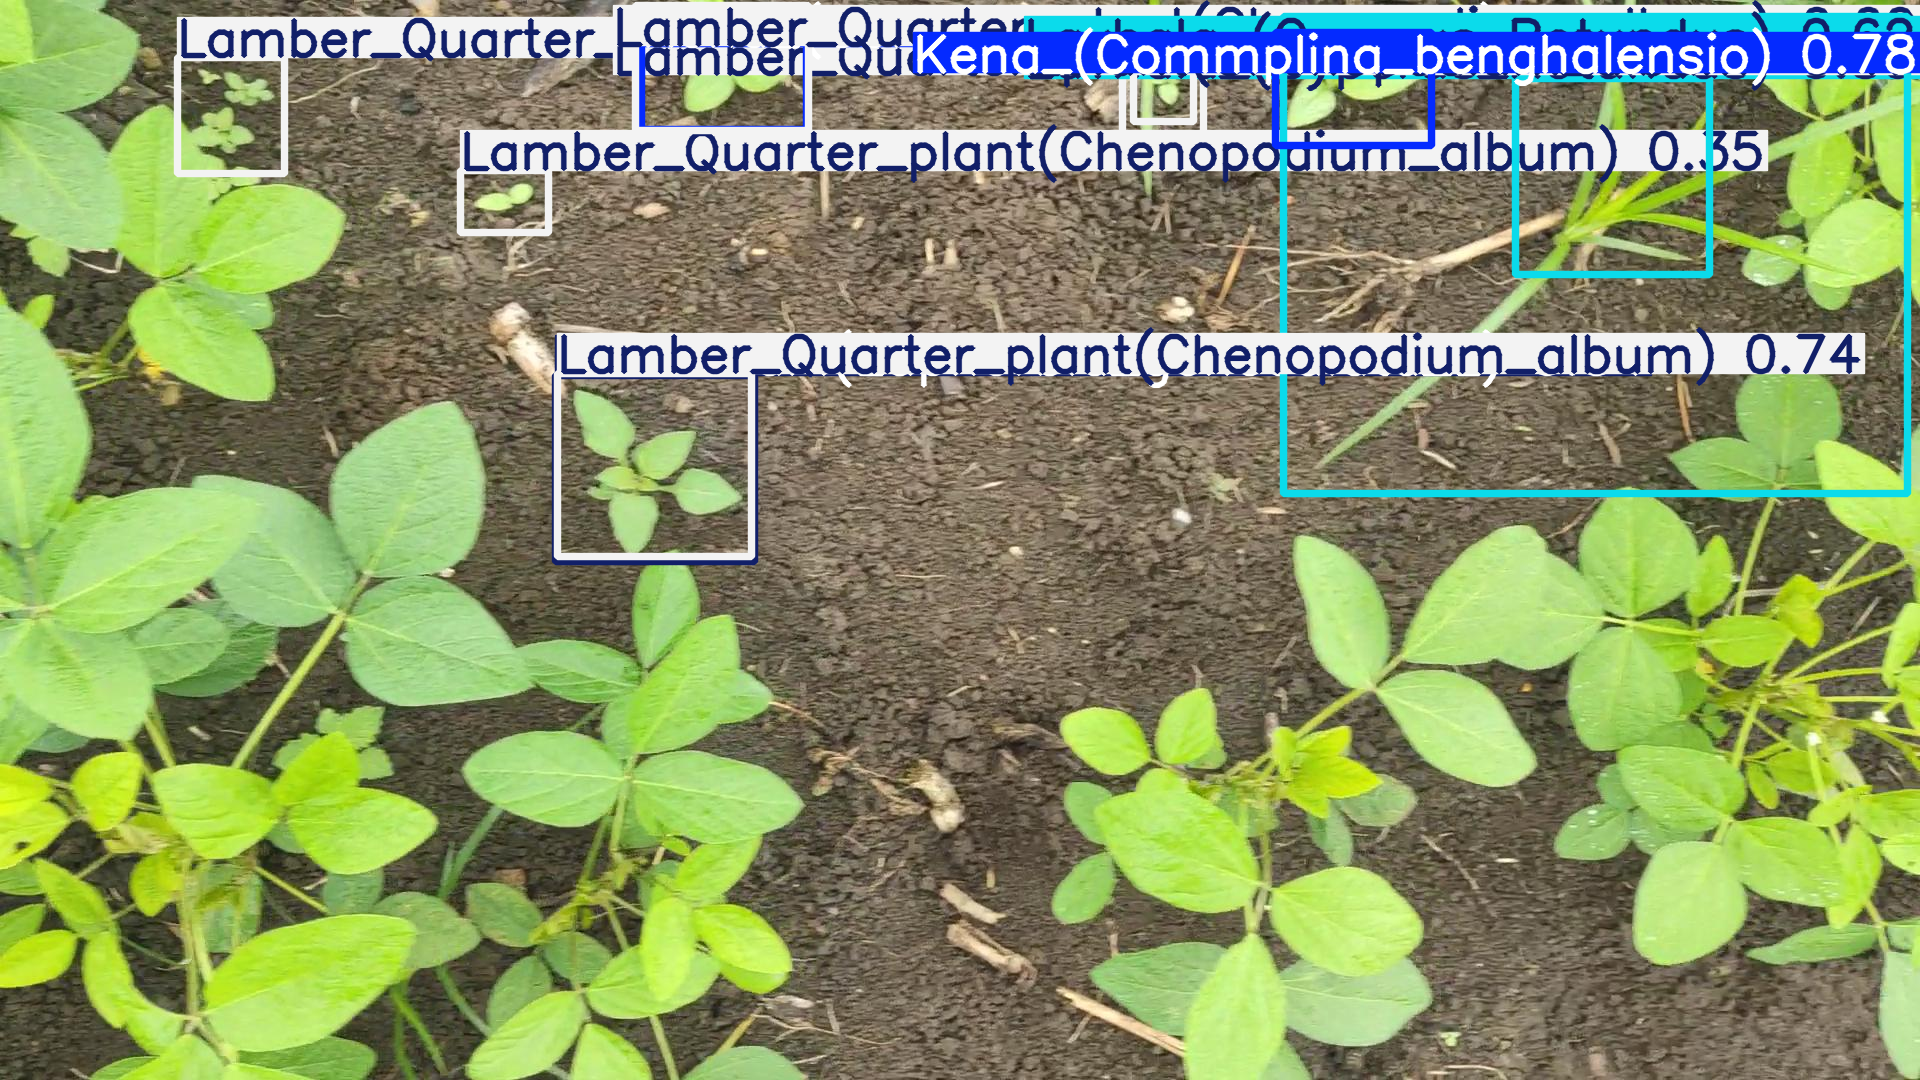

In [30]:
tests[400].show()